# 状態空間モデル
ARMAモデルを状態空間で表現する．

$ x_t = F x_t + G u_t $

$ y_t = H x_t + w_t $

## 関連
- `time_series_model.ipynb`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [3]:
def generate_state_data(F, G, Q, x_0, size):
    data = np.zeros((size, len(x_0)))
    x = x_0
    data[0] = x
    for i in range(1, size):
        x = F@x + G@np.random.normal(loc=0, scale=Q, size=(1,))
        data[i] = x
    return data

def generate_obs_data(H, R, series):
    obs = (H@series.T).T
    obs += np.random.normal(loc=0, scale=R, size=(len(series),1))
    return obs 

## ARモデル


In [4]:
# 移動平均の次数
p = 3 
# 状態空間の次数
# N_p = p
print(f'N = {p}')

# 状態遷移行列 (p, p)
"""
自己回帰係数，単位根になると時系列が発散するので注意
"""
a = np.array([-0.9, -0.7, -0.5]).reshape(p, 1)
print(a)
F_ar = np.block([a, np.vstack([np.eye(p-1), np.zeros((1, p-1))])])
print(f'F_ma = \n{F_ar}')

# ノイズ重み (p, 1), b_0=1を含む． 
G_ar = np.block([[1], [np.zeros((p-1,1))]])
print(f'G_ma = \n{G_ar}')

# 観測モデル (1, p)
H_ar = np.block([1, np.zeros((1, p-1))])
print(f'H_ma = \n{H_ar}')

# モデルノイズstd
sigma_m = 1
Q_ar = sigma_m
# 観測ノイズstd
sigma_o = 0.1
R_ar = sigma_o

N = 3
[[-0.9]
 [-0.7]
 [-0.5]]
F_ma = 
[[-0.9  1.   0. ]
 [-0.7  0.   1. ]
 [-0.5  0.   0. ]]
G_ma = 
[[1.]
 [0.]
 [0.]]
H_ma = 
[[1. 0. 0.]]


In [5]:
# データを生成
sample_size = 100
x_0 = np.ones(p)
state_data_ar = generate_state_data(F_ar, G_ar, Q_ar, x_0, sample_size)
obs_data_ar = generate_obs_data(H_ar, R_ar, state_data_ar)

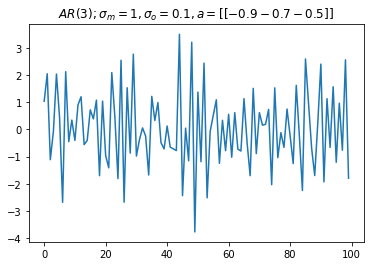

In [6]:
plt.plot(obs_data_ar)
_ = plt.title(f'$AR({p}); \sigma_m={sigma_m}, \sigma_o={sigma_o}, a={a.T}$')

## MAモデル


In [49]:
# 移動平均の次数
q = 3 
# 状態空間の次数
N_q = q + 1
print(f'N = {N_q}')

# 状態遷移行列 (N_q, N_q)
F_ma = np.block([[np.zeros((N_q-1, 1)), np.eye(N_q-1)], [np.zeros(N_q)]])
print(f'F_ma = \n{F_ma}')

# ノイズ重み (N_q, 1), b_0=1を含む． 
"""
ここが重要
b
"""
b = np.array([0.5, 0.5, 0.5])
G_ma = np.array([1, *b]).reshape(N_q, 1)
print(f'G_ma = \n{G_ma}')

# 観測モデル (1, N_q)
H_ma = np.block([1, np.zeros((1, N_q-1))])
print(f'H_ma = \n{H_ma}')

# モデルノイズstd
sigma_m = 1
Q_ma = sigma_m
# 観測ノイズstd
sigma_o = 0.1
R_ma = sigma_o

N = 4
F_ma = 
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
G_ma = 
[[1. ]
 [0.5]
 [0.5]
 [0.5]]
H_ma = 
[[1. 0. 0. 0.]]


In [50]:
# データを生成
sample_size = 100
x_0 = np.ones(N_q)
state_data_ma = generate_state_data(F_ma, G_ma, Q_ma, x_0, sample_size)
obs_data_ma = generate_obs_data(H_ma, R_ma, state_data_ma)

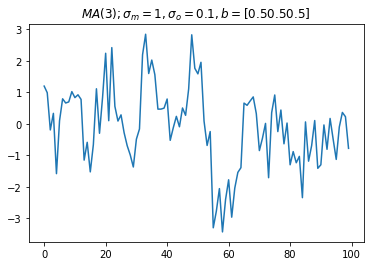

In [56]:
plt.plot(obs_data_ma)
_ = plt.title(f'$MA({q}); \sigma_m={sigma_m}, \sigma_o={sigma_o}, b={b.T}$')

# ARMAモデル
ARモデル，MAモデルでそれぞれ定義した係数を使ってARMAモデルを作る．

In [52]:
N = max([p,q+1])
print(f'p = {p}, q = {q}, N = {N}')

# a, bを0拡張
if N > p:
    a_N = np.vstack([a, np.zeros(N-p)])
else:
    a_N = a

if N > q+1:
    b_N = np.hstack([b, np.zeros(N-q-2)])
else:
    b_N = b

# 状態遷移行列 (N, N)
F = np.block([a_N, np.vstack([np.eye(N-1), np.zeros((1, N-1))])])
print(f'F = \n{F}')

# ノイズ重み (N, 1), b_0=1を含む． 
G = np.array([1, *b_N]).reshape(N, 1)
print(f'G = \n{G}')

# 観測モデル (1, N)
H = np.block([1, np.zeros((1, N-1))])
print(f'H_ma = \n{H}')

# モデルノイズstd
sigma_m = 1
Q = sigma_m
# 観測ノイズstd
sigma_o = 0.1
R = sigma_o

p = 3, q = 3, N = 4
F = 
[[-0.9  1.   0.   0. ]
 [-0.7  0.   1.   0. ]
 [-0.5  0.   0.   1. ]
 [ 0.   0.   0.   0. ]]
G = 
[[1. ]
 [0.5]
 [0.5]
 [0.5]]
H_ma = 
[[1. 0. 0. 0.]]


In [53]:
# データを生成
sample_size = 100
x_0 = np.ones(N)
state_data = generate_state_data(F, G, Q, x_0, sample_size)
obs_data = generate_obs_data(H, R, state_data)

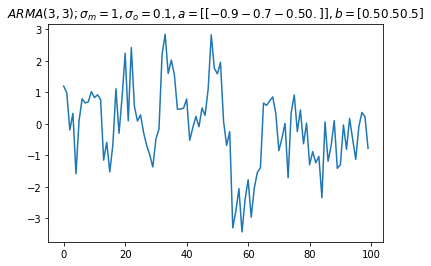

In [55]:
plt.plot(obs_data_ma)
_ = plt.title(f'$ARMA({p},{q}); \sigma_m={sigma_m}, \sigma_o={sigma_o}, a={a_N.T}, b={b_N.T}$')